The goal of the homework is to study, based on actual production data, the notion of "peak oil" introduced in lecture 1

#### Administrativia
Groups composition to be provided no later than Wednesday, Sep. 25, 8 PM (by email)\
GROUPS SHALL DIFFER IN MEMBERSHIP FROM HOMEWORK #1\
Homework to be turned in Thursday, Oct. 3, 10 PM (deposit .ipynb file in Moodle / General Informations, only 1 submission per group)\
Please indicate here the names of the group's members:

* `Yassine ERRAJI`
* `Daniil NOTKIN`
* `Abderrahmene BENGUEDOUAR`

#### Data set
One CSV file, Oil_production.csv taken from https://www.energyinst.org/statistical-review/resources-and-data-downloads \
Description: crude oil production in million tonnes by country/region (col.A) and year\
NOTE: this is a good example of using "real world" imperfect data sets which have not been prepared for machine processing\
IMPORTANT: Your program shall take as input this csv file, without manual cleaning/preparation

In [64]:
# We first start by importing necessary libraries
import pandas as pd 
import numpy as np 

#### Data preparation
Study the data set and identify what cleanup/preparation steps are needed \
Remove all "Total" lines and remove USSR (it appears after the 1991 breakup as its member countries)

In [56]:
# We start by importing the csv file by specifying that the separater between values is a semi-column
oildata = pd.read_csv("Oil_production.csv", delimiter=';', skiprows=2, decimal=",")

# We set the first column (country names) to count as the index
oildata.set_index(oildata.columns[0], inplace=True)

# get rid of rows with N/A values. This effectively removes the last text rows
oildata = oildata.dropna()

# We get rid of the USSR row
oildata = oildata.drop("USSR")

# We get rid of rows that have "total" in their index's names.
oildata = oildata[~oildata.index.str.contains('Total')]

# We also get rid of rows after "Total World" by slicing, crude, but effective
oildata = oildata[0:56]

# Apply relevant replacements
oildata.replace("^", 0, inplace=True)
oildata.replace("-", np.nan, inplace=True)
oildata.replace("?", 0, inplace=True)

# print the first five and the last five rows
print(oildata.head(5))
print(oildata.tail(5))

            1965   1966   1967   1968   1969   1970   1971   1972   1973  \
Country                                                                    
Canada      43,9   48,2   52,7   57,1   62,2   70,1   75,2   86,7  100,3   
Mexico      18,1   18,5   20,5   21,9     23   24,2   24,1   25,1   25,9   
US         427,7  454,5  484,2  502,9  511,4  533,5  525,9  527,9  514,7   
Argentina   13,8   14,6     16   17,5   18,1     20   21,6   22,2   21,6   
Brazil         5    6,2    7,8    8,5    9,3    8,8    9,2      9    9,2   

            1974  ...   2017   2018   2019   2020   2021   2022   2023  \
Country           ...                                                    
Canada      94,4  ...  236,6  257,7  263,5    252  266,6  273,9  277,9   
Mexico      32,4  ...  109,5  102,3   94,9   95,1   96,4   97,6  102,5   
US         491,4  ...  574,2  669,6    751  713,3  715,9  762,1  827,1   
Argentina   21,1  ...   27,3   27,6   33,8   33,7   37,6   45,4   51,2   
Brazil       9,6  ...  

In [58]:
oildata

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2017,2018,2019,2020,2021,2022,2023,2023.1,2013-23,2023.2
Country,,,,,,,,,,,,,,,,,,,,,
Canada,"43,9","48,2","52,7","57,1","62,2","70,1","75,2","86,7","100,3","94,4",...,"236,6","257,7","263,5",252,"266,6","273,9","277,9","1,43%","3,60%","6,20%"
Mexico,"18,1","18,5","20,5","21,9",23,"24,2","24,1","25,1","25,9","32,4",...,"109,5","102,3","94,9","95,1","96,4","97,6","102,5","5,02%","-3,20%","2,30%"
US,"427,7","454,5","484,2","502,9","511,4","533,5","525,9","527,9","514,7","491,4",...,"574,2","669,6",751,"713,3","715,9","762,1","827,1","8,54%","6,30%","18,30%"
Argentina,"13,8","14,6",16,"17,5","18,1",20,"21,6","22,2","21,6","21,1",...,"27,3","27,6","33,8","33,7","37,6","45,4","51,2","12,98%","5,40%","1,10%"
Brazil,5,"6,2","7,8","8,5","9,3","8,8","9,2",9,"9,2","9,6",...,"142,6","140,6","151,2","159,3","156,9","163,2","183,7","12,55%","5,20%","4,10%"
Colombia,"10,7","10,4","10,1","9,3","11,2","11,8","11,7","10,6","9,9","9,1",...,45,"45,6","46,7","41,3","38,8","39,7","40,9","3,05%","-2,60%","0,90%"
Ecuador,"0,4","0,4","0,3","0,3","0,2","0,2","0,2","4,2","11,2","9,5",...,"28,5","27,7","28,5","25,8","25,3","25,8","25,5","-1,18%","-1,00%","0,60%"
Guyana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,4,6,"13,8","19,5","40,80%",NaN,"0,40%"
Peru,"3,4","3,4","3,8",4,"3,9","3,9","3,3","3,5","3,8","4,1",...,"5,7","5,9","6,1","5,5","5,3","5,4","5,1","-4,43%","-3,40%","0,10%"


#### Data processing
Write a function which takes as input :
1. time series (floats)
2.   a threshold (float)

and returns true if the last two data points of the time series are more than threshold % lower than the maximum value in the series

In [59]:
def has_peaked(series, threshold):
    ''' 
    Determines if the oil production series has peaked based on a threshold.
    * series: A list or Pandas Series of floating values corresponding to years 1965-2023
    * threshold: A float between 0 and 1 representing the percentage difference from the max
    '''
    if len(series) < 2:
        return False  # Not enough data to make a decision

    max_val = series.max()
    # checks if the last two points are smaller than the maximum by at least the threshold percentage
    return (series.iloc[-1] < max_val * (1 - threshold)) and (series.iloc[-2] < max_val * (1 - threshold))

In [61]:
# Preprocessing function to replace commas with periods and convert to float
def preprocess_dataframe(df):
    # Replace commas with periods in the entire DataFrame
    df = df.replace({',': '.'}, regex=True)
    
    # Convert all columns to numeric (this will convert valid numbers and NaNs)
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df

# Clean the dataframe values' format 
df = preprocess_dataframe(oildata)

##### First graph
Plot on Y axis the percentage (0 to 1) of all oil-producing countries whose recent production (last 2 years) is more than threshold % lower than their peak as a function of threshold, with threshold ranging from 0 to 100 (X axis)\
How many countries have not peaked yet?

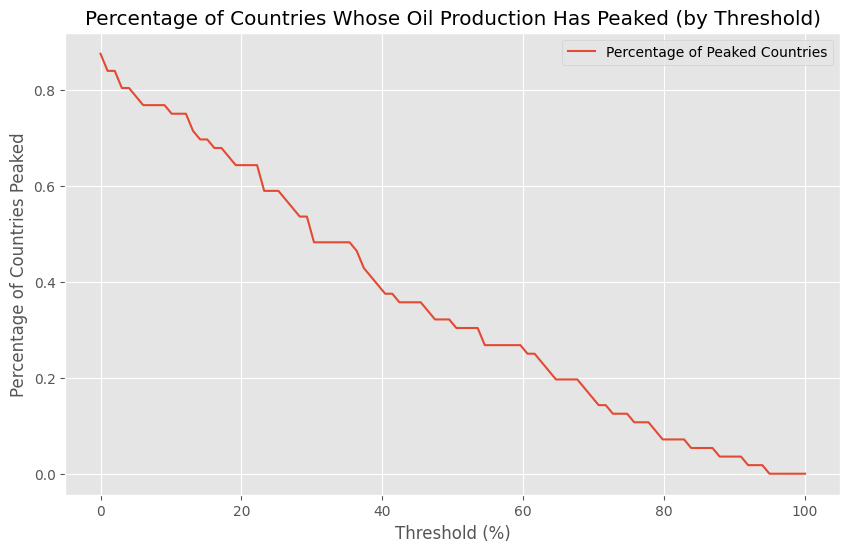

In [63]:
import matplotlib.pyplot as plt

# Generate threshold values from 0% to 100% (converted to fractions from 0 to 1)
threshold_values = np.linspace(0, 1, 100)

# A function to calculate the percentage of countries peaking at each threshold
def calculate_percentage_peaking(df, threshold_values):
    percentages = []

    # Iterate through each threshold
    for threshold in threshold_values:
        peaked_countries = 0
        total_countries = 0
        
        # Check for each country (iterate through rows of the dataframe)
        for idx, row in df.iterrows():
            series = row.dropna().astype(float)  # Convert series to float and remove NaNs
            if len(series) > 2:
                total_countries += 1
                if has_peaked(series, threshold):
                    peaked_countries += 1
        
        # Calculate percentage of countries that peaked
        if total_countries > 0:
            percentage = peaked_countries / total_countries
        else:
            percentage = 0
        percentages.append(percentage)
    
    return percentages

# Calculate percentages for each threshold
percentages = calculate_percentage_peaking(df, threshold_values)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(threshold_values * 100, percentages, label='Percentage of Peaked Countries')
plt.xlabel('Threshold (%)')
plt.ylabel('Percentage of Countries Peaked')
plt.title('Percentage of Countries Whose Oil Production Has Peaked (by Threshold)')
plt.grid(True)
plt.legend()
plt.show()

#### Second graph
Plot a stacked vertical bar graph with each country on the X axis (sorted by decreasing value of the country's maximum production). Each bar displays both the 2023  production and the maximum production (in a lighter color) of the country\
Bonus points if the bar's color encodes the oil-producing region the country belongs to.